In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'sicilia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-28T17:00:00,19,Sicilia,725,133,858,25124,25982,211,453,...,21.0,24790.0,4860.0,221.0,15.50,3.30,1.83,9.32,-0.75,0.82
370,2021-03-01T17:00:00,19,Sicilia,726,132,858,25323,26181,199,478,...,18.0,20864.0,4918.0,199.0,15.38,3.28,2.29,9.72,-0.75,0.77
371,2021-03-02T17:00:00,19,Sicilia,726,123,849,24880,25729,-452,566,...,14.0,24743.0,4571.0,-443.0,14.49,3.30,2.29,12.38,-6.82,-1.73
372,2021-03-03T17:00:00,19,Sicilia,696,117,813,24316,25129,-600,539,...,17.0,25171.0,4930.0,-564.0,14.39,3.24,2.14,10.93,-4.88,-2.33


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 560
Nuovi tamponi: 26837.0
Percentuale nuovi positivi/nuovi tamponi: 2.1 %
Nuovi guariti: 1130.0
Nuovi deceduti: 14.0
Variazione positivi ricoverati con sintomi: -20.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: -565.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,19,Sicilia,1137,184,1321,34270,35591,641,1047,...,26.0,6319.0,3798.0,596.0,13.93,3.71,16.57,27.57,-1.08,1.83
1,2021-01-04T17:00:00,19,Sicilia,1181,186,1367,35211,36578,987,1391,...,34.0,7597.0,4852.0,941.0,13.61,3.74,18.31,28.67,1.09,2.77
2,2021-01-05T17:00:00,19,Sicilia,1198,190,1388,36038,37426,848,1576,...,36.0,9537.0,6290.0,827.0,13.69,3.71,16.53,25.06,2.15,2.32
3,2021-01-06T17:00:00,19,Sicilia,1190,194,1384,36355,37739,313,1692,...,29.0,9767.0,5860.0,317.0,14.02,3.67,17.32,28.87,2.11,0.84
4,2021-01-07T17:00:00,19,Sicilia,1228,196,1424,37281,38705,966,1435,...,36.0,8572.0,4998.0,926.0,13.76,3.68,16.74,28.71,1.03,2.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,19,Sicilia,725,133,858,25124,25982,211,453,...,21.0,24790.0,4860.0,221.0,15.50,3.30,1.83,9.32,-0.75,0.82
57,2021-03-01T17:00:00,19,Sicilia,726,132,858,25323,26181,199,478,...,18.0,20864.0,4918.0,199.0,15.38,3.28,2.29,9.72,-0.75,0.77
58,2021-03-02T17:00:00,19,Sicilia,726,123,849,24880,25729,-452,566,...,14.0,24743.0,4571.0,-443.0,14.49,3.30,2.29,12.38,-6.82,-1.73
59,2021-03-03T17:00:00,19,Sicilia,696,117,813,24316,25129,-600,539,...,17.0,25171.0,4930.0,-564.0,14.39,3.24,2.14,10.93,-4.88,-2.33


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

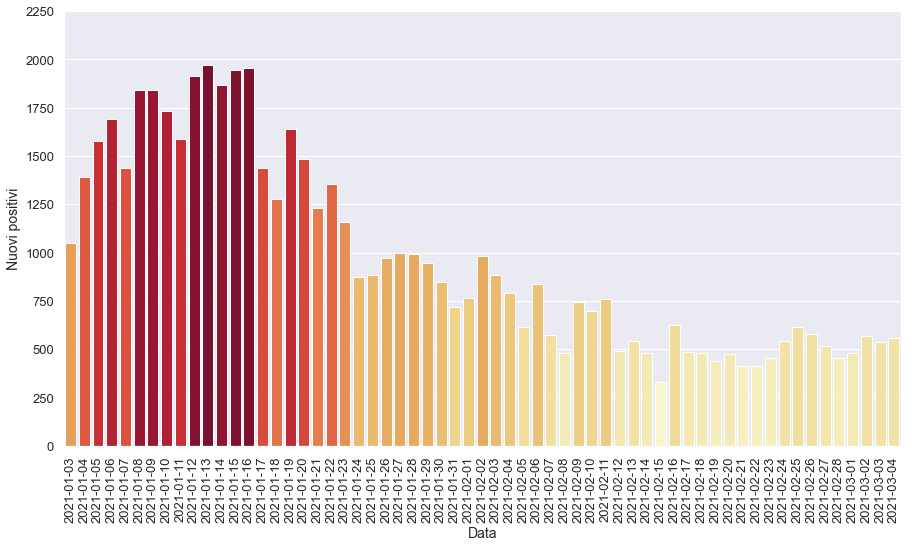

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

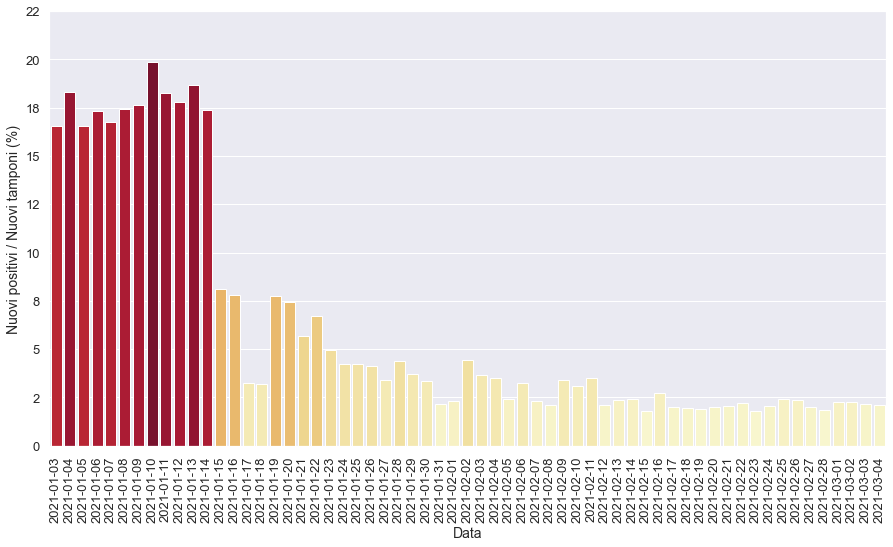

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

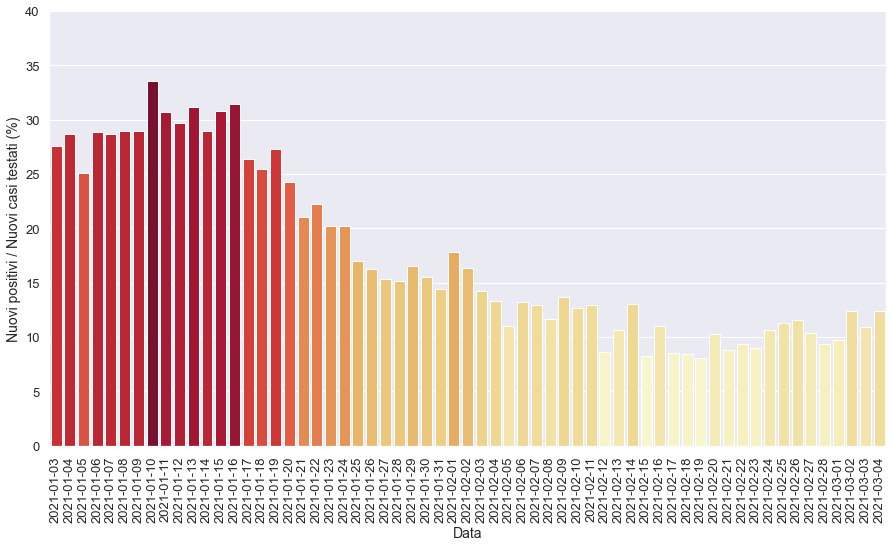

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

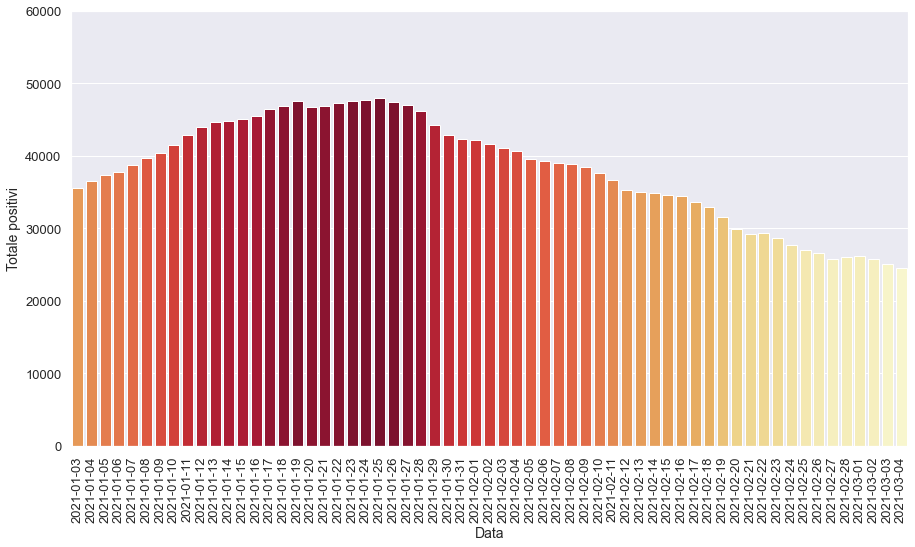

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

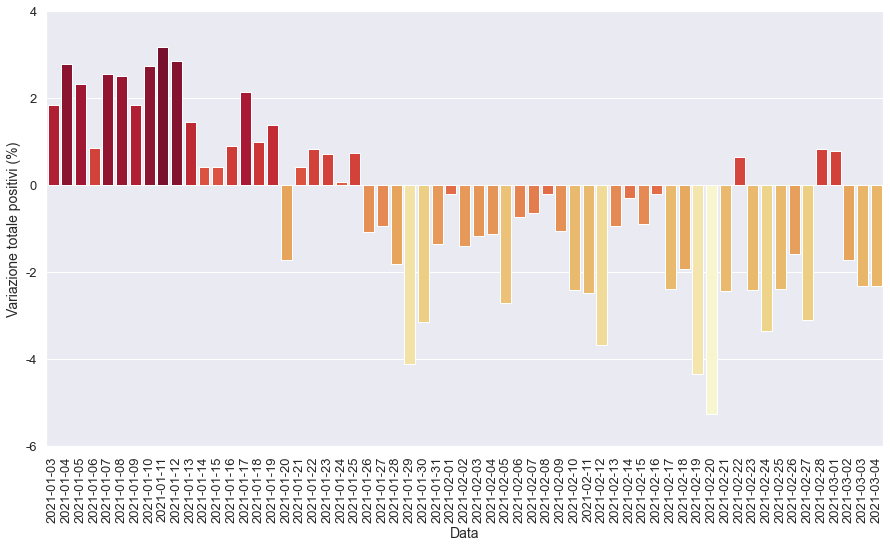

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

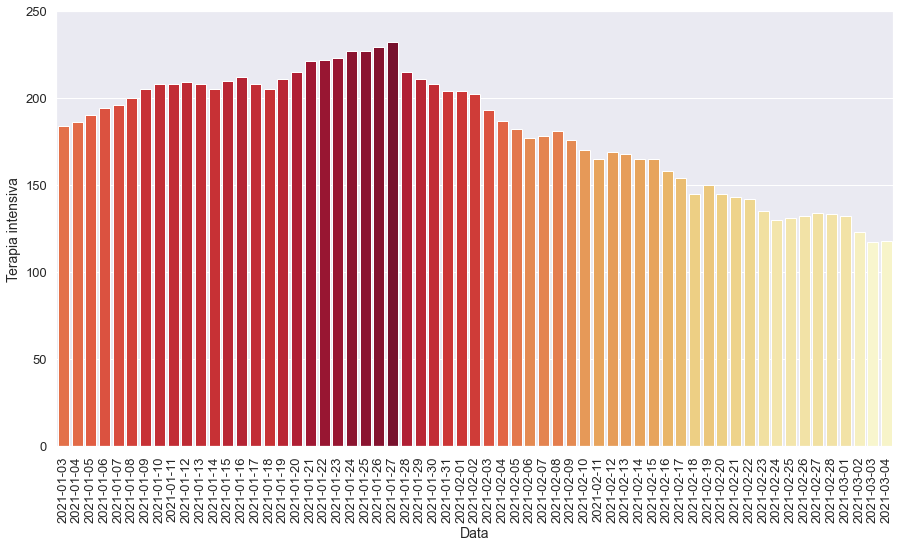

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

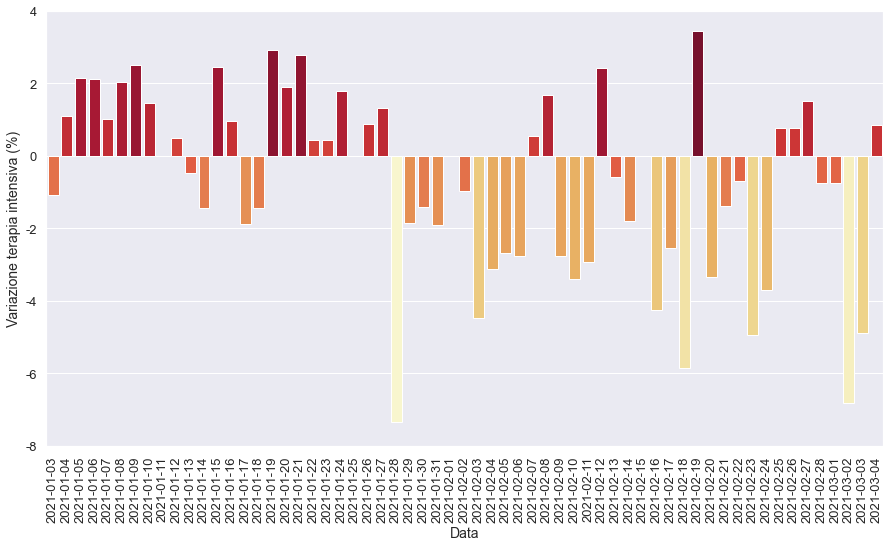

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

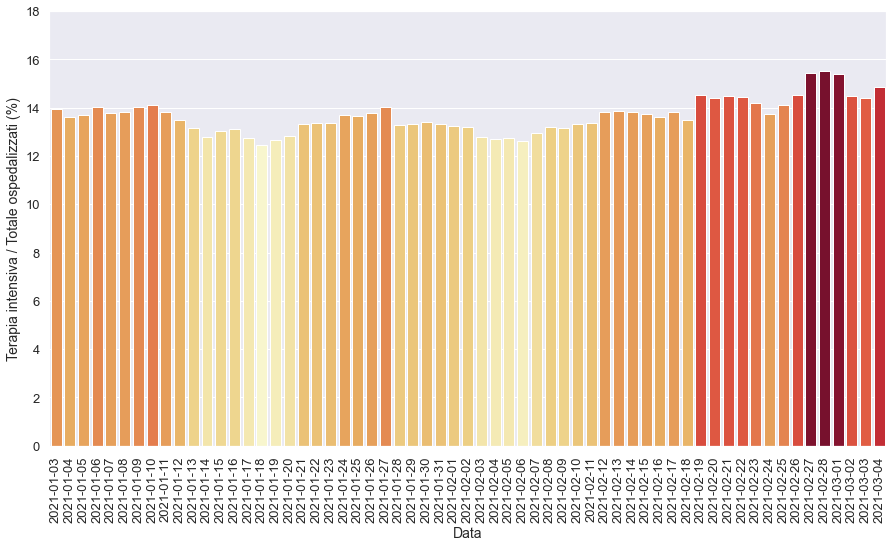

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

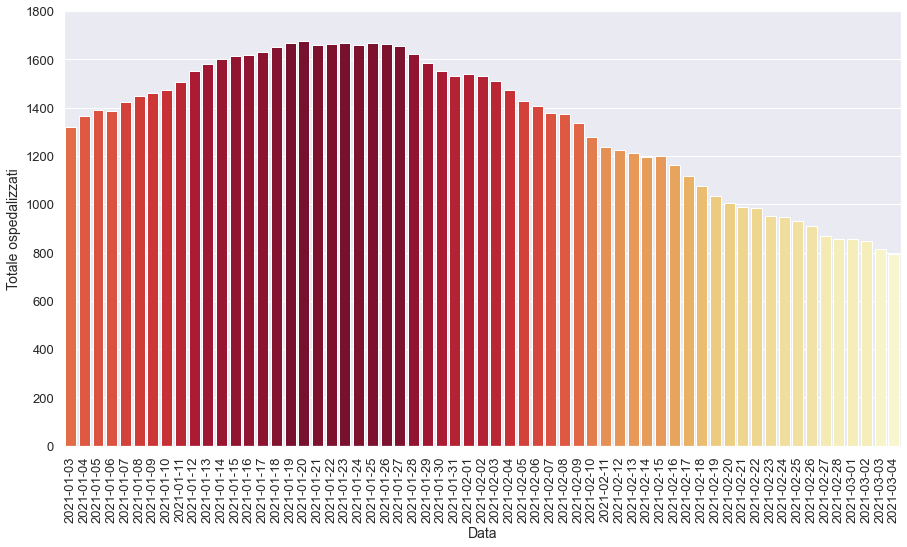

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

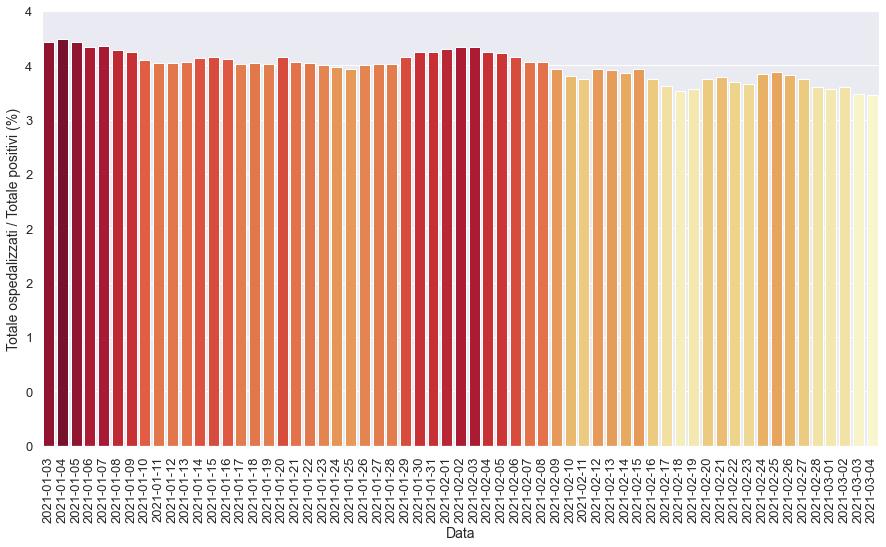

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

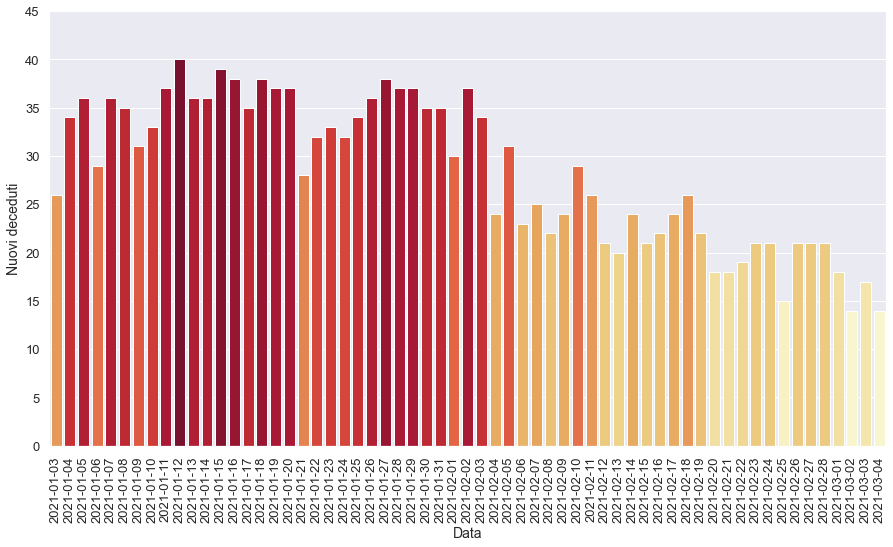

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

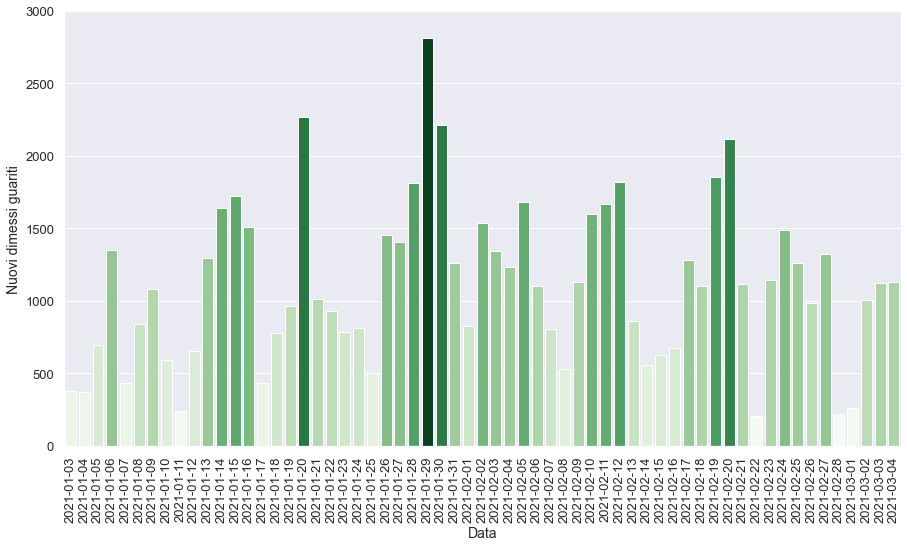

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,19,Sicilia,1327,202,1529,40084,41613,-589,984,...,37.0,22255.0,6015.0,-578.0,13.21,3.67,4.42,16.36,-0.98,-1.40
1,2021-02-03T17:00:00,19,Sicilia,1317,193,1510,39612,41122,-491,886,...,34.0,24130.0,6240.0,-472.0,12.78,3.67,3.67,14.20,-4.46,-1.18
2,2021-02-04T17:00:00,19,Sicilia,1286,187,1473,39181,40654,-468,789,...,24.0,22377.0,5935.0,-431.0,12.70,3.62,3.53,13.29,-3.11,-1.14
3,2021-02-05T17:00:00,19,Sicilia,1244,182,1426,38128,39554,-1100,616,...,31.0,25206.0,5577.0,-1053.0,12.76,3.61,2.44,11.05,-2.67,-2.71
4,2021-02-06T17:00:00,19,Sicilia,1228,177,1405,37861,39266,-288,836,...,23.0,25710.0,6304.0,-267.0,12.60,3.58,3.25,13.26,-2.75,-0.73
5,2021-02-07T17:00:00,19,Sicilia,1198,178,1376,37633,39009,-257,574,...,25.0,24633.0,4431.0,-228.0,12.94,3.53,2.33,12.95,0.56,-0.65
6,2021-02-08T17:00:00,19,Sicilia,1192,181,1373,37559,38932,-77,478,...,22.0,22446.0,4100.0,-74.0,13.18,3.53,2.13,11.66,1.69,-0.20
7,2021-02-09T17:00:00,19,Sicilia,1161,176,1337,37184,38521,-411,744,...,24.0,21948.0,5420.0,-375.0,13.16,3.47,3.39,13.73,-2.76,-1.06
8,2021-02-10T17:00:00,19,Sicilia,1108,170,1278,36309,37587,-934,695,...,29.0,22360.0,5466.0,-875.0,13.30,3.40,3.11,12.71,-3.41,-2.42
9,2021-02-11T17:00:00,19,Sicilia,1071,165,1236,35419,36655,-932,760,...,26.0,21602.0,5870.0,-890.0,13.35,3.37,3.52,12.95,-2.94,-2.48


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

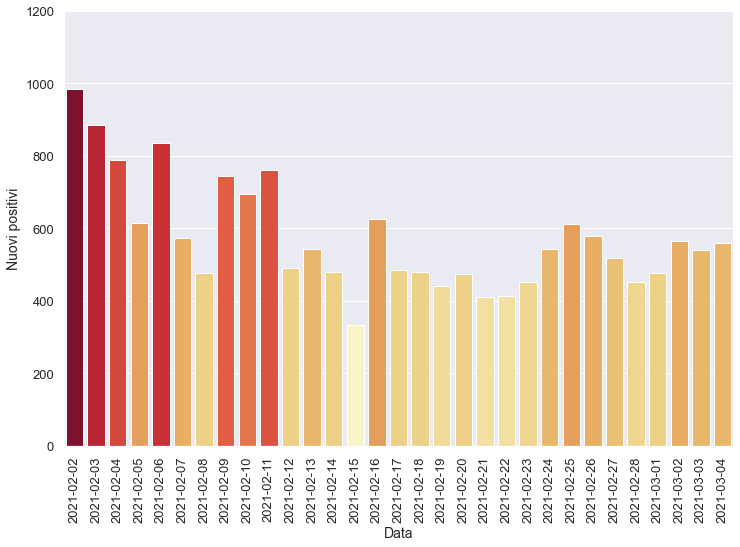

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

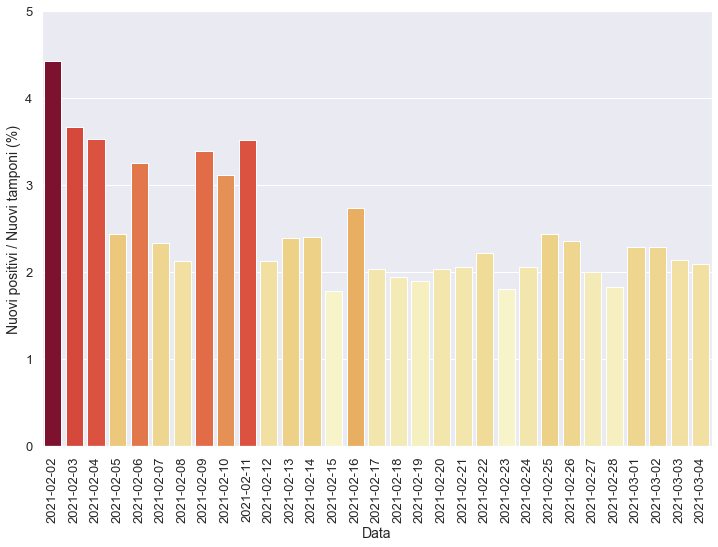

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

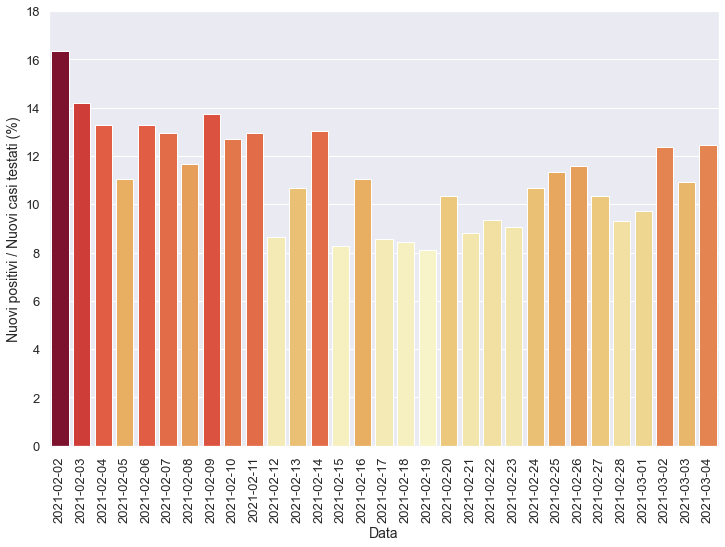

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

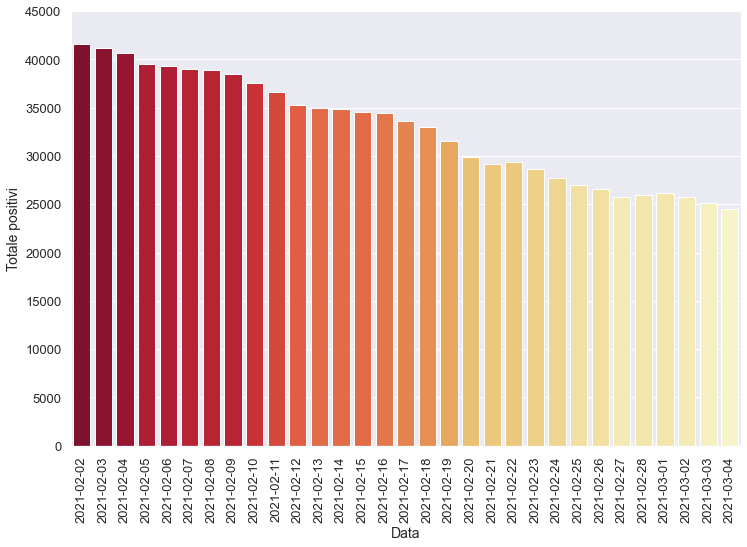

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

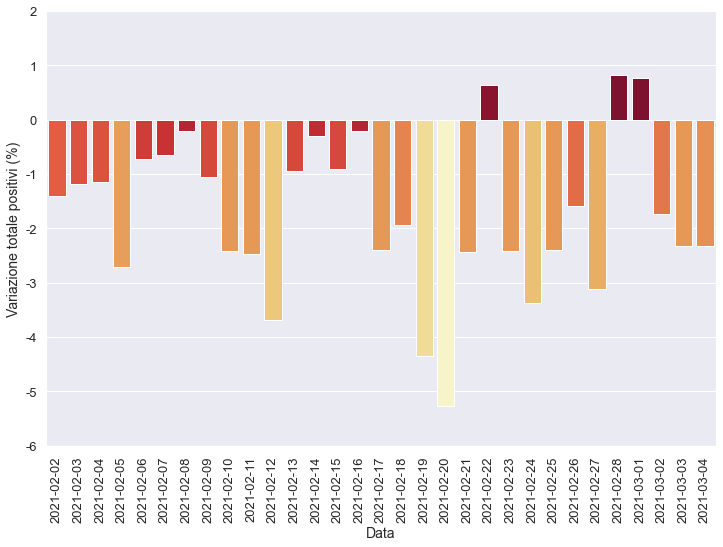

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

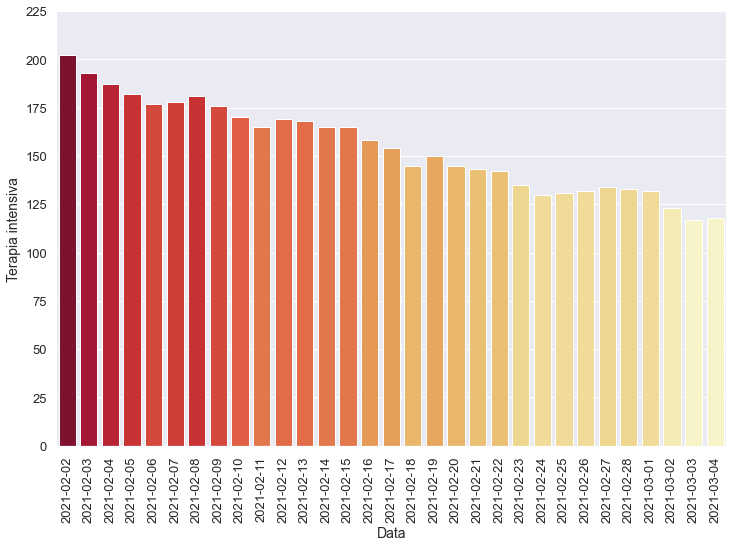

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

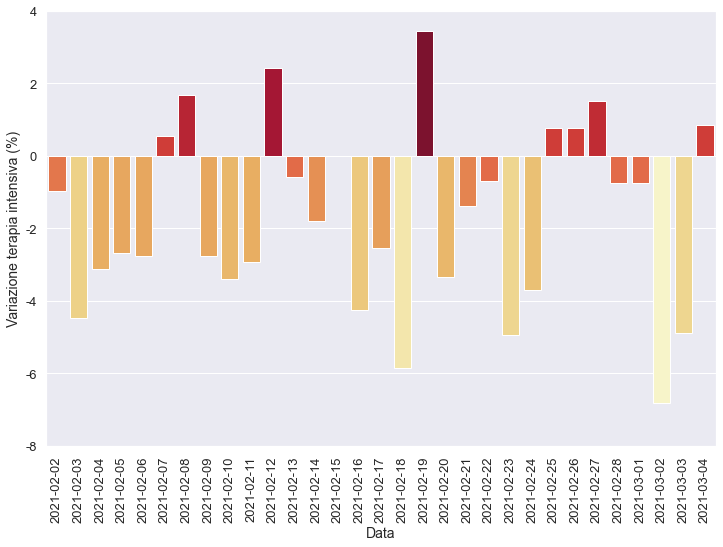

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

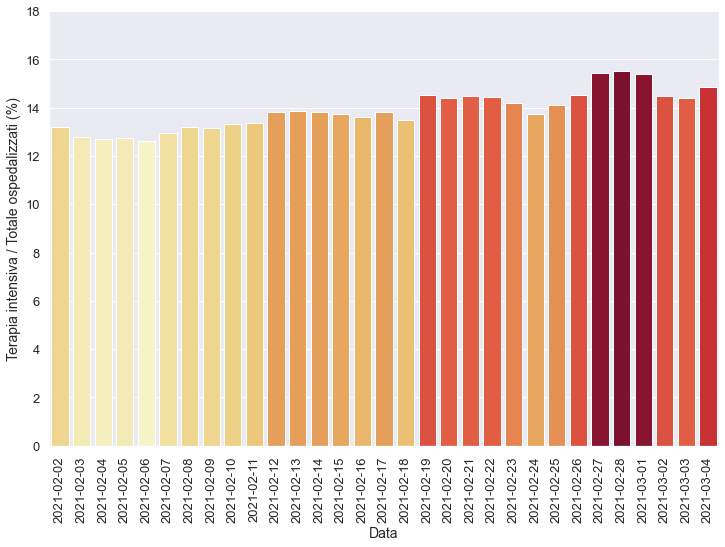

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

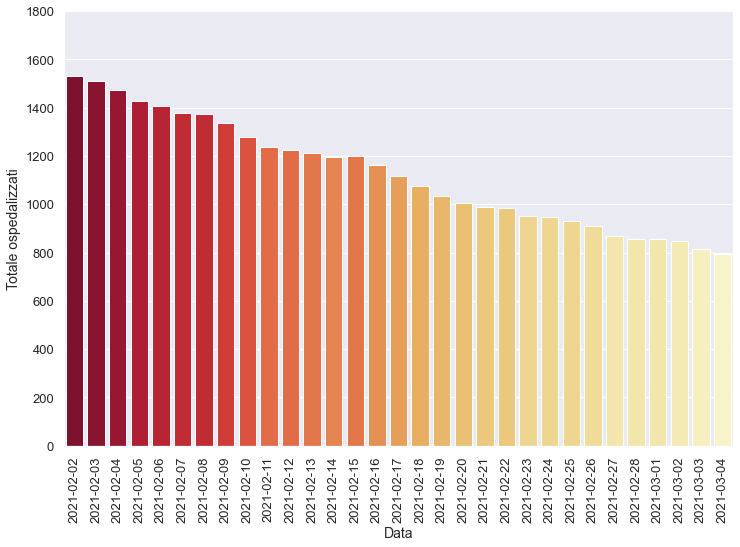

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

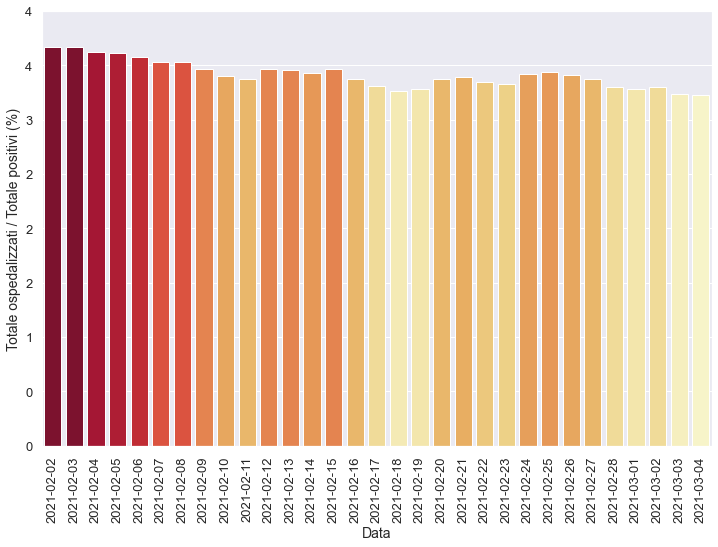

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

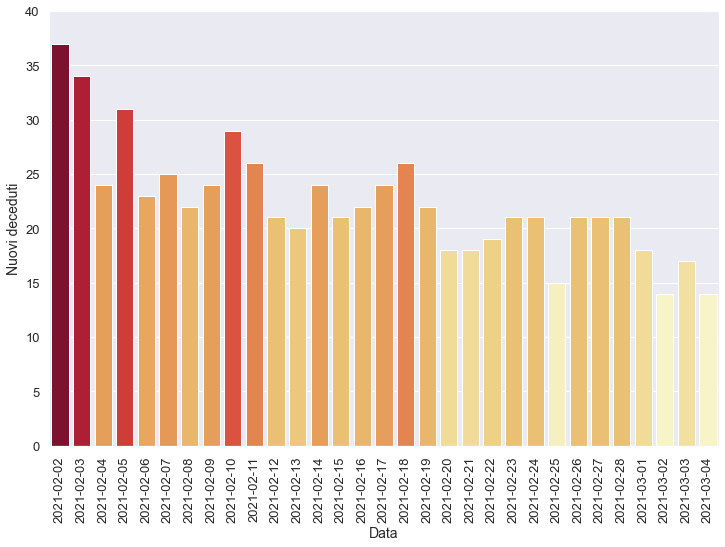

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

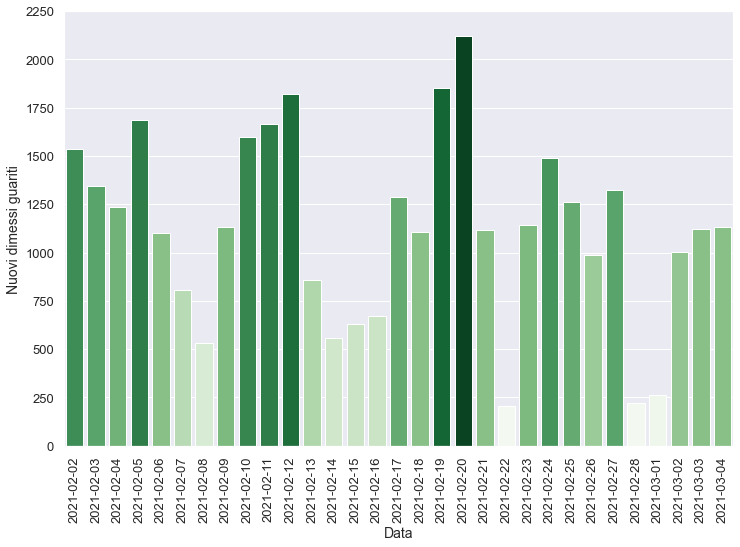

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,19,Sicilia,799,131,930,26096,27026,-664,613,...,15.0,25187.0,5404.0,-648.0,14.09,3.44,2.43,11.34,0.77,-2.40
1,2021-02-26T17:00:00,19,Sicilia,776,132,908,25689,26597,-429,578,...,21.0,24570.0,4995.0,-407.0,14.54,3.41,2.35,11.57,0.76,-1.59
2,2021-02-27T17:00:00,19,Sicilia,734,134,868,24903,25771,-826,518,...,21.0,25929.0,5005.0,-786.0,15.44,3.37,2.00,10.35,1.52,-3.11
3,2021-02-28T17:00:00,19,Sicilia,725,133,858,25124,25982,211,453,...,21.0,24790.0,4860.0,221.0,15.50,3.30,1.83,9.32,-0.75,0.82
4,2021-03-01T17:00:00,19,Sicilia,726,132,858,25323,26181,199,478,...,18.0,20864.0,4918.0,199.0,15.38,3.28,2.29,9.72,-0.75,0.77
5,2021-03-02T17:00:00,19,Sicilia,726,123,849,24880,25729,-452,566,...,14.0,24743.0,4571.0,-443.0,14.49,3.30,2.29,12.38,-6.82,-1.73
6,2021-03-03T17:00:00,19,Sicilia,696,117,813,24316,25129,-600,539,...,17.0,25171.0,4930.0,-564.0,14.39,3.24,2.14,10.93,-4.88,-2.33
7,2021-03-04T17:00:00,19,Sicilia,676,118,794,23751,24545,-584,560,...,14.0,26837.0,4503.0,-565.0,14.86,3.23,2.09,12.44,0.85,-2.32


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

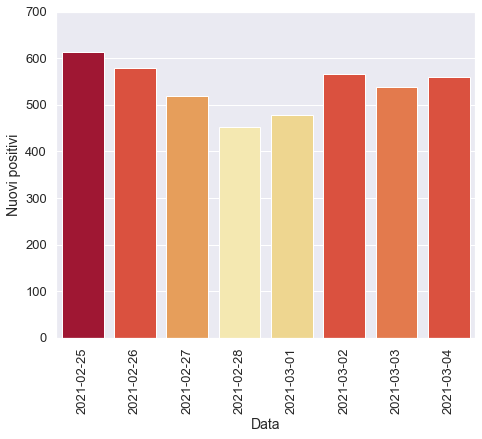

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

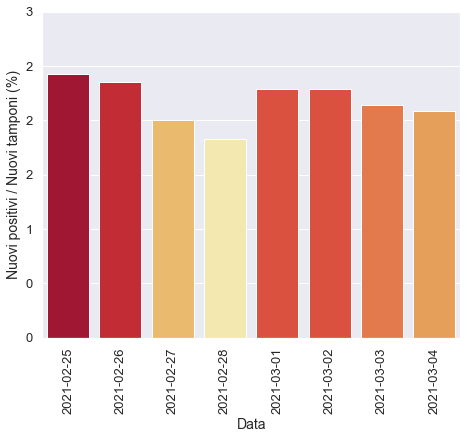

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

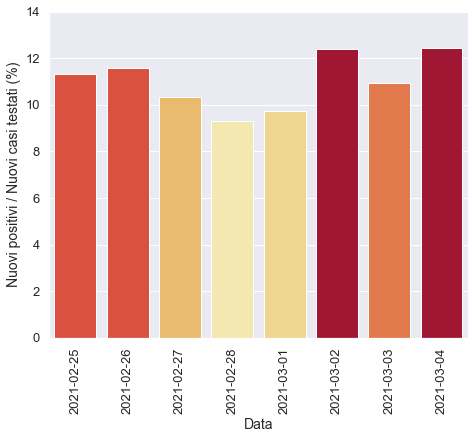

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

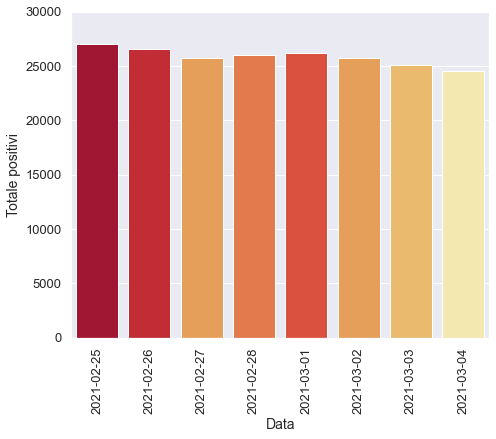

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

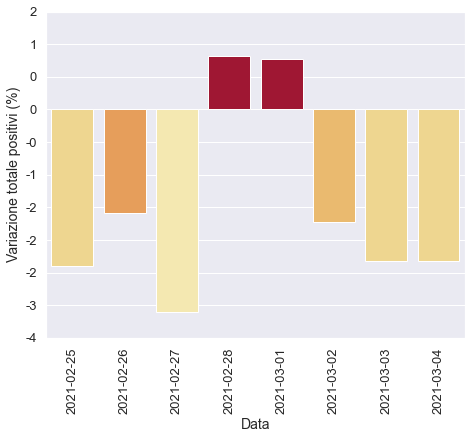

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

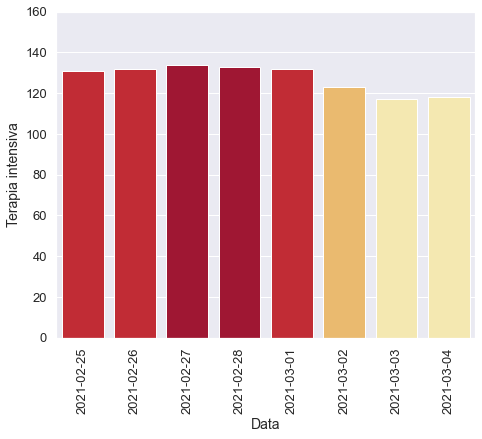

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

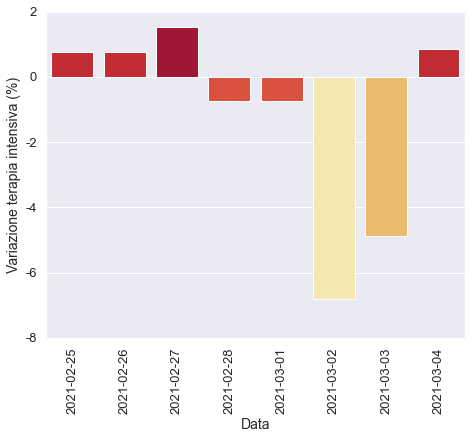

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

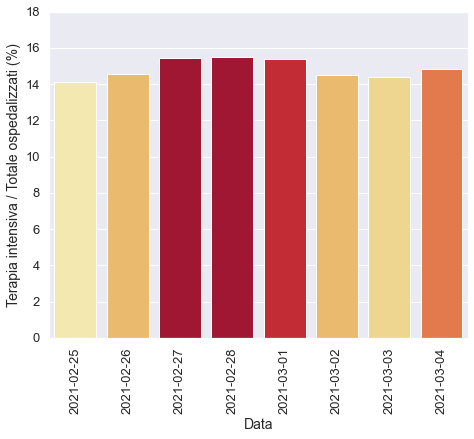

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

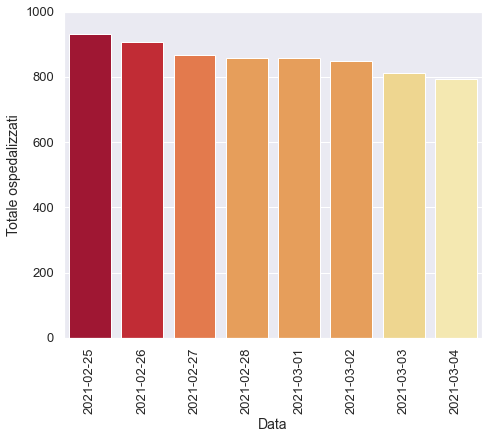

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

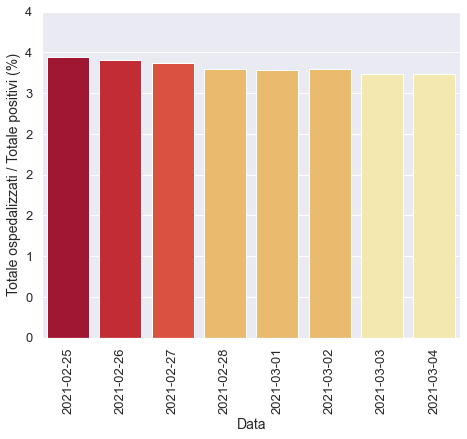

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

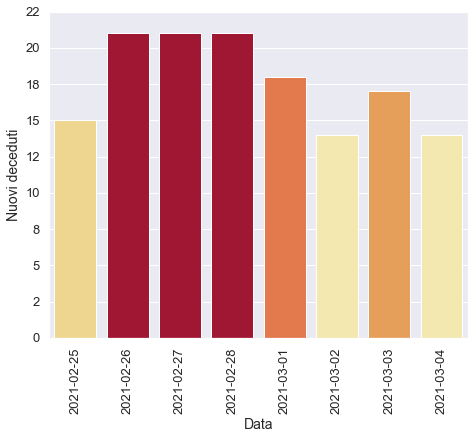

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

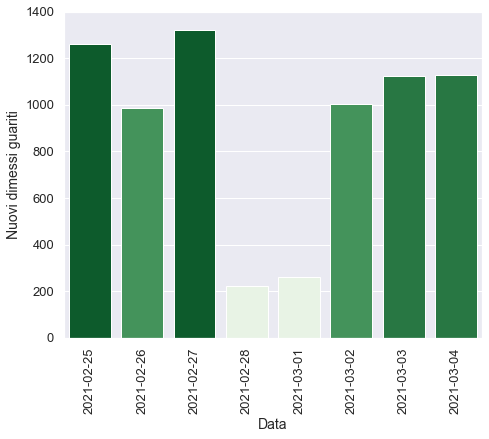

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)